# Good Structure: Components Alternation

In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def alternation_score(sequence):

    # Collapse consecutive 'text' or 'count' elements
    collapsed = []
    prev = None
    for elem in sequence:
        if elem in ["text", "count"]:
            if prev != elem:
                collapsed.append(elem)
        else:
            collapsed.append(elem)
        prev = elem

    if len(collapsed) < 2:
        return 1.0

    changes = sum(1 for i in range(len(collapsed) - 1) if collapsed[i] != collapsed[i + 1])
    score = changes / (len(collapsed) - 1)
    return score



In [ ]:
with open("data_stories_summary.json", "r", encoding="utf-8") as f:
    data = json.load(f)

results = []

for story_id, story_content in data.items():
    elements = story_content.get("elements", [])
    score = alternation_score(elements)
    results.append({
        "story_id": story_id,
        "alternation_score": score
    })

df_alternation = pd.DataFrame(results)
df_alternation.to_csv("outputs/alternation_scores.csv")

    story_id  alternation_score
0   D-hp3wDV           0.700000
1   y4Srva15           0.400000
2   7qpfziir           0.928571
3   Nokx0yU6           0.666667
4   gz_gxhYn           0.928571
5   U2OtB3XT           0.928571
6   v4h_GSI0           0.800000
7   1ptR3pru           0.250000
8   JQpdcw-d           0.882353
9   B9SLlUry           0.428571
10  r7i-PG2n           0.846154
11  AUmcnOzL           0.888889
12  tyK82z37           0.764706
13  IRRbkmZk           0.818182
14  Vy4_Rxzv           0.500000
15  M9EZmoBI           0.851852
16  uhDaBOl1           0.733333
17  SXefpzf4           0.500000
18  EzsIH_Et           0.500000
19  16FP4tfG           0.400000
20  sUMoEZI5           0.684211
21  _HnVHPjm           0.666667
22  4D206Lam           0.454545
23  j3ZikN40           0.700000
24  BOGODrvZ           1.000000
25  abkhtH-r           0.300000
26  Huo1mZpJ           1.000000
27  JYOzBt8Y           0.500000
28  buiNjeJj           0.473684
29  PziKYGG_           0.882353
30  wa1_

In [2]:
df_alternation = pd.read_csv('outputs/alternation_scores.csv', index_col=0)
df_sparql = pd.read_csv('outputs/sparql_proficiency_final.csv', index_col=0)
df_combined = pd.merge(df_alternation[['story_id', 'alternation_score']],
                       df_sparql[['story_id', 'sparql_proficiency']],
                       on='story_id', how='inner')

story_no_text = ['SXefpzf4', 'EzsIH_Et', '6yGct8pP']

df_filtered = df_combined[~df_combined['story_id'].isin(story_no_text)]

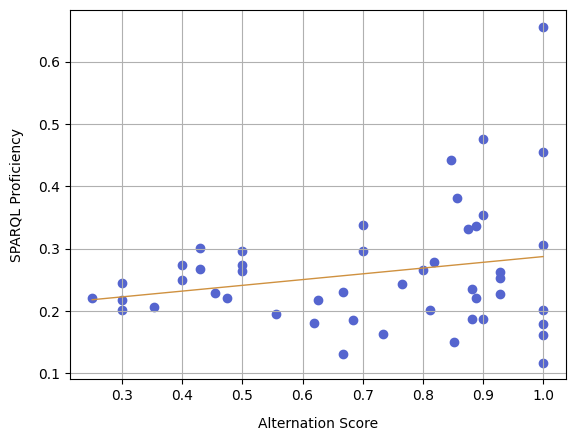

In [ ]:
color_palette = ['#5565cf', '#b14ecf', '#cf4773', '#cf913f', '#87cf38', '#30cf6b', '#29a1cf', '#2138cf']
 
x = np.array(df_filtered['alternation_score'])
y = np.array(df_filtered['sparql_proficiency'])
 
# Compute best-fit line (linear regression)
m, b = np.polyfit(x, y, 1)  # 1st-degree polynomial (y = mx + b)
 
# Create scatter plot
plt.scatter(x, y, color=color_palette[0], label="Data points")
 
# Plot best-fit line
x_sorted = np.sort(x)
plt.plot(x_sorted, m*x_sorted + b, color=color_palette[3], linewidth=1, label="Best-fit line")
 
# Labels and title
plt.xlabel("Alternation Score", labelpad=10)
plt.ylabel("SPARQL Proficiency", labelpad=10)
plt.grid(True)
# Save as JPG with 300 dpi and EPS (vector format, resolution-independent)
# plt.savefig("outputs/img/18.jpg", dpi=300, bbox_inches="tight", format="jpg")
# plt.savefig("outputs/img/18.eps", format="eps", bbox_inches="tight")
plt.show()

In [3]:
from scipy.stats import pearsonr, spearmanr

# Pearson correlation (measures linear relationship)
pearson_corr, pearson_p = pearsonr(x, y)

# Spearman correlation (measures monotonic relationship, rank-based)
spearman_corr, spearman_p = spearmanr(x, y)

# Print results
print(f"Pearson correlation: {pearson_corr:.3f} (p-value: {pearson_p:.3f})")
print(f"Spearman correlation: {spearman_corr:.3f} (p-value: {spearman_p:.3f})")

Pearson correlation: 0.221 (p-value: 0.131)
Spearman correlation: 0.080 (p-value: 0.589)
